<a href="https://colab.research.google.com/github/Antonio-gt-87/Proyecto_integrado-2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define materias escolares argentinas de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Ciudadanía', 'Arte', 'Música', 'Informática']

# Crear una lista de apellidos y nombres (puedes expandir esta lista)
apellidos = ['Gómez', 'Pérez', 'Rodríguez', 'López', 'Fernández', 'González', 'Martínez', 'Sánchez', 'Ramírez', 'Torres']
nombres = ['Juan', 'Ana', 'Pedro', 'María', 'Carlos', 'Laura', 'José', 'Sofía', 'Luis', 'Elena']


# Función para generar datos de un alumno
def generar_alumno(nro_dni):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)  # Nota del primer trimestre
    nota2 = random.randint(1, 10)  # Nota del segundo trimestre
    nota3 = random.randint(1, 10)  # Nota del tercer trimestre
    faltas = random.randint(0, 20)  # Cantidad de faltas
    return [materia, nota1, nota2, nota3, faltas]



# Crear DataFrame
data = []
for i in range(100): #Generar 100 alumnos
  nro_dni = random.randint(10000000, 99999999) # generar DNI aleatorio
  alumno = generar_alumno(nro_dni)
  data.append([i+1, nro_dni, random.choice(apellidos), random.choice(nombres)] + alumno)


df = pd.DataFrame(data, columns=['Id', 'DNI', 'Apellido', 'Nombre', 'Materia escolar', 'nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre', 'Faltas a clases'])

# Mostrar el DataFrame
df

,Id,DNI,Apellido,Nombre,Materia escolar,nota 1er Trimestre,nota 2do Trimestre,nota 3er Trimestre,Faltas a clases
0,1,33439610,Rodríguez,Elena,Ciudadanía,8,7,4,9
1,2,67266239,González,Elena,Inglés,10,3,9,1
2,3,98271528,González,Juan,Ciudadanía,5,5,8,12
3,4,71505732,Pérez,Ana,Física,6,7,10,20
4,5,10998447,Sánchez,María,Educación Física,10,5,9,19
...,...,...,...,...,...,...,...,...,...
95,96,44556253,Torres,Sofía,Informática,9,5,1,0
96,97,39188330,Torres,José,Química,6,8,8,5
97,98,30628701,Ramírez,Luis,Música,5,1,3,18
98,99,60550263,Martínez,Juan,Ciudadanía,10,3,9,15


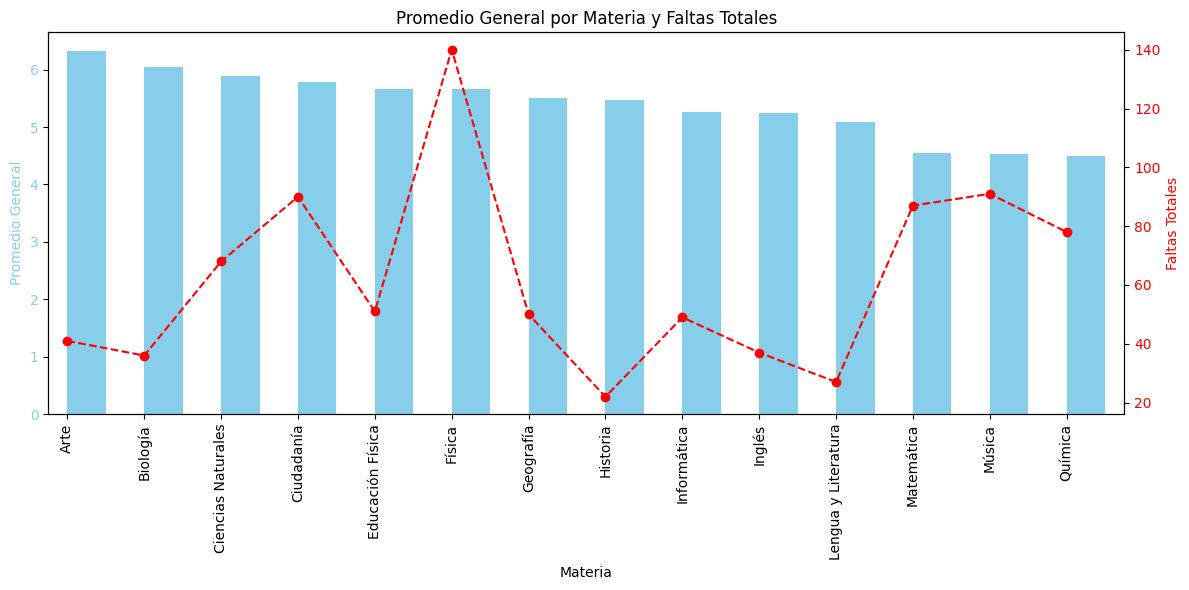

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia escolar')[['nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre']].mean().mean(axis=1)

# Sort subjects by average grade in descending order
average_grades = average_grades.sort_values(ascending=False)

# Calculate total absences per subject
total_absences = df.groupby('Materia escolar')['Faltas a clases'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
average_grades.plot(kind='bar', ax=ax1, color='skyblue', position=0)
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Materia')
ax1.set_title('Promedio General por Materia y Faltas Totales')


# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind='line', ax=ax2, color='red', marker='o', linestyle='dashed')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add labels and legends
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)